# Loading database and importing analysis tools


In [ ]:
# see more details in the course first lecture
!mkdir /root/.kaggle/
import json
import os

# Installing the Kaggle package
!pip install kaggle
!pip install seaborn
!pip install matplotlib

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"barpartush","key":"8a317917ff49eff55fb5cac049adbc48"}


# creating kaggle.json file with the personal API-Key details
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

# Creating a dataset directory
!mkdir ./datasets
!mkdir ./datasets/bikeAccidents

# download the dataset from Kaggle and unzip it
!kaggle datasets download johnharshith/bicycle-accidents-in-great-britain-1979-to-2018 -p ./datasets/bikeAccidents/
!chdir ./datasets/bikeAccidents
!unzip ./datasets/bikeAccidents/*.zip  -d ./datasets/bikeAccidents
!ls ./datasets/bikeAccidents

Dataset URL: https://www.kaggle.com/datasets/johnharshith/bicycle-accidents-in-great-britain-1979-to-2018
License(s): CC-BY-NC-SA-4.0
 88% 11.0M/12.5M [00:01<00:00, 14.7MB/s]
100% 12.5M/12.5M [00:01<00:00, 10.1MB/s]
/bin/bash: line 1: chdir: command not found
Archive:  ./datasets/bikeAccidents/bicycle-accidents-in-great-britain-1979-to-2018.zip
  inflating: ./datasets/bikeAccidents/Accidents.csv  
  inflating: ./datasets/bikeAccidents/Bikers.csv  
Accidents.csv  bicycle-accidents-in-great-britain-1979-to-2018.zip  Bikers.csv


Let's load the Bikers & Accidents csv to a Pandas DataFrames objects:

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
AccidentsDF = pd.read_csv('./datasets/bikeAccidents/Accidents.csv', encoding='cp437' )
BikersDF = pd.read_csv('./datasets/bikeAccidents/Bikers.csv', encoding='cp437' )
AccidentsDF.index = AccidentsDF['Accident_Index']
BikersDF.index = BikersDF['Accident_Index']
del AccidentsDF['Accident_Index']
del BikersDF['Accident_Index']
print(AccidentsDF.columns)
AccidentsDF

Index(['Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Time',
       'Speed_limit', 'Road_conditions', 'Weather_conditions', 'Day',
       'Road_type', 'Light_conditions'],
      dtype='object')


,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions
Accident_Index,,,,,,,,,,
197901A1SEE71,2,1,1979-01-01,18:20,50.0,Snow,Unknown,Monday,Dual carriageway,Darkness lights lit
197901A2JDW40,1,1,1979-02-01,09:15,30.0,Snow,Unknown,Tuesday,Unknown,Daylight
197901A4IJV90,2,1,1979-04-01,08:45,30.0,Snow,Unknown,Thursday,Unknown,Daylight
197901A4NIE33,2,1,1979-04-01,13:40,30.0,Wet,Unknown,Thursday,Unknown,Daylight
197901A4SKO47,2,1,1979-04-01,18:50,30.0,Wet,Unknown,Thursday,Unknown,Darkness lights lit
...,...,...,...,...,...,...,...,...,...,...
2018983118818,2,1,2018-02-07,14:55,30.0,Dry,Clear,Monday,Single carriageway,Daylight
2018983119218,2,1,2018-07-24,07:45,30.0,Dry,Clear,Tuesday,Single carriageway,Daylight
2018983120618,2,1,2018-10-08,13:25,20.0,Dry,Clear,Friday,Single carriageway,Daylight


In [ ]:
print(BikersDF.columns)
BikersDF

Index(['Gender', 'Severity', 'Age_Grp'], dtype='object')


,Gender,Severity,Age_Grp
Accident_Index,,,
197901A1SEE71,Male,Serious,36 to 45
197901A2JDW40,Male,Slight,46 to 55
197901A4IJV90,Male,Slight,46 to 55
197901A4NIE33,Male,Slight,36 to 45
197901A4SKO47,Male,Slight,46 to 55
...,...,...,...
2018983118818,Male,Slight,6 to 10
2018983119218,Male,Serious,56 to 65
2018983120618,Male,Serious,11 to 15


# What is the leading reasons for bike accidents?


Is the road speed limit affects the amount of bike accidents?

In [ ]:
SpeedlimitDF = AccidentsDF[['Speed_limit']]
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
SpeedlimitDF['Speed_Category'] = pd.cut(SpeedlimitDF['Speed_limit'], bins=bins, labels=labels, include_lowest=True, right=False)
SpeedlimitDF = SpeedlimitDF['Speed_Category'].value_counts().sort_index().reset_index()
SpeedlimitDF.columns = ['Speed_category' , 'Accident_count']
SpeedlimitDF2 = SpeedlimitDF.copy()
SpeedlimitDF2.index = SpeedlimitDF2['Speed_category']
del SpeedlimitDF2['Speed_category']
SpeedlimitDF = SpeedlimitDF.sort_values(by='Accident_count', ascending=False)
SpeedlimitDF.index = SpeedlimitDF['Speed_category']
del SpeedlimitDF['Speed_category']
SpeedlimitDF2

<ipython-input-4-c170601f06c9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SpeedlimitDF['Speed_Category'] = pd.cut(SpeedlimitDF['Speed_limit'], bins=bins, labels=labels, include_lowest=True, right=False)


,Accident_count
Speed_category,
0-10,79
11-20,160
21-30,10847
31-40,686817
41-50,53343
51-60,6685
61-70,58566
71-80,11363
81-90,0


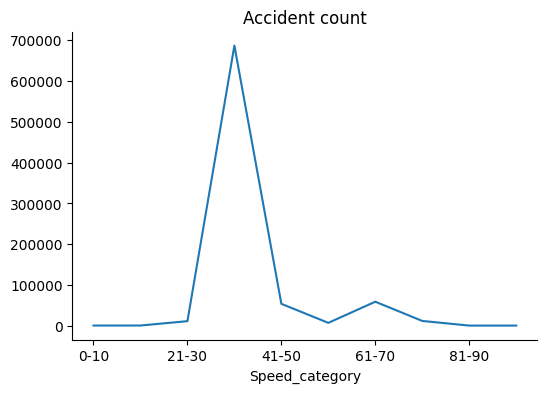

In [ ]:
SpeedlimitDF2['Accident_count'].plot(kind='line', figsize=(6, 4), title='Accident count')
plt.gca().spines[['top', 'right']].set_visible(False)

Is the road condition affects the amount of bike accidents?

In [ ]:
RoadConditionDF = AccidentsDF[['Road_conditions']]
RoadConditionDF = RoadConditionDF['Road_conditions'].value_counts().reset_index()
RoadConditionDF.columns = ['Road_condition' , 'Accident_count']
RoadConditionDF.index = RoadConditionDF['Road_condition']
del RoadConditionDF['Road_condition']
RoadConditionDF

,Accident_count
Road_condition,
Dry,633936
Wet,184279
Frost,6020
Snow,1710
Missing Data,1648
Flood,268


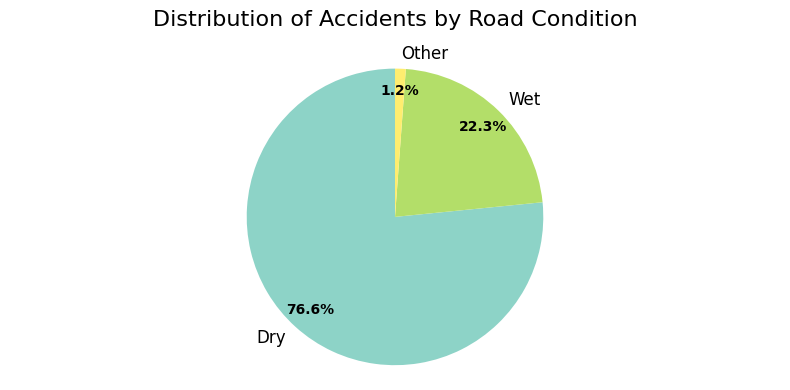

In [ ]:
# Step 1: Group smaller categories
threshold = 1.0  # Adjust this value to change what's considered a "small" category
main_categories = RoadConditionDF[RoadConditionDF['Accident_count'] / RoadConditionDF['Accident_count'].sum() > threshold/100]
other = pd.DataFrame({'Accident_count': RoadConditionDF[RoadConditionDF['Accident_count'] / RoadConditionDF['Accident_count'].sum() <= threshold/100]['Accident_count'].sum()}, index=['Other'])
grouped_df = pd.concat([main_categories, other])

# Create an improved pie chart
plt.figure(figsize=(8, 4))
colors = plt.cm.Set3(np.linspace(0, 1, len(grouped_df)))  # Generate a color palette

patches, texts, autotexts = plt.pie(grouped_df['Accident_count'],
                                    labels=grouped_df.index,
                                    autopct='%1.1f%%',
                                    startangle=90,
                                    colors=colors,
                                    pctdistance=0.85)

# Enhance the appearance
plt.title('Distribution of Accidents by Road Condition', fontsize=16, pad=20)
plt.setp(texts, fontsize=12)
plt.setp(autotexts, fontsize=10, weight="bold")

# Add a circle at the center to make it a donut chart (optional)
# center_circle = plt.Circle((0,0), 0.70, fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(center_circle)

plt.axis('equal')
plt.tight_layout()
plt.show()

Is the weather affects the amount of bike accidents?

In [ ]:
WeatherConditionDF = AccidentsDF[['Weather_conditions']]
WeatherConditionDF = WeatherConditionDF['Weather_conditions'].value_counts().reset_index()
WeatherConditionDF.columns = ['Weather_condition' , 'Accident_count']
WeatherConditionDF.index = WeatherConditionDF['Weather_condition']
del WeatherConditionDF['Weather_condition']
WeatherConditionDF

,Accident_count
Weather_condition,
Clear,683162
Rain,82007
Unknown,24081
Clear and windy,11891
Other,11820
Rain and windy,8808
Fog,3369
Snow,2086
Snow and windy,483


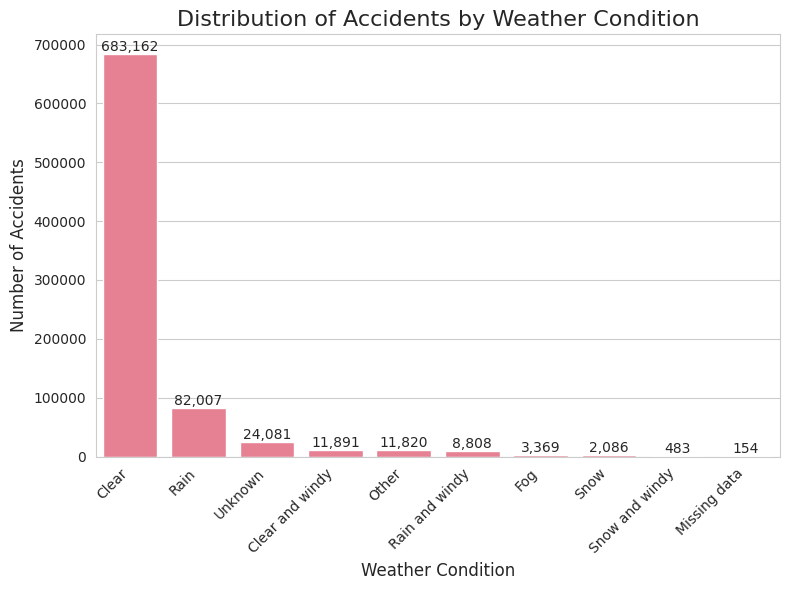

In [ ]:
# Reset the index to make 'Weather_condition' a column again
WeatherConditionDF = WeatherConditionDF.reset_index()

# Sort the dataframe by Accident_count in descending order
WeatherConditionDF = WeatherConditionDF.sort_values('Accident_count', ascending=False)

# Set the style and color palette
sns.set_style("whitegrid")
sns.set_palette("husl")

# Create the figure and axes
plt.figure(figsize=(8, 6))

# Create the bar plot
ax = sns.barplot(x='Weather_condition', y='Accident_count', data=WeatherConditionDF)

# Customize the plot
plt.title('Distribution of Accidents by Weather Condition', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(WeatherConditionDF['Accident_count']):
    ax.text(i, v, f'{v:,}', ha='center', va='bottom')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

In which day most of the bike accidents accure ?

In [ ]:
DayDF = AccidentsDF[['Day']]
DayDF = DayDF['Day'].value_counts().reset_index()
DayDF.columns = ['Day' , 'Accident_count']
DayDF.index = DayDF['Day']
del DayDF['Day']
DayDF

,Accident_count
Day,
Wednesday,136756
Tuesday,136534
Thursday,136263
Friday,132066
Monday,125749
Saturday,87652
Sunday,72841


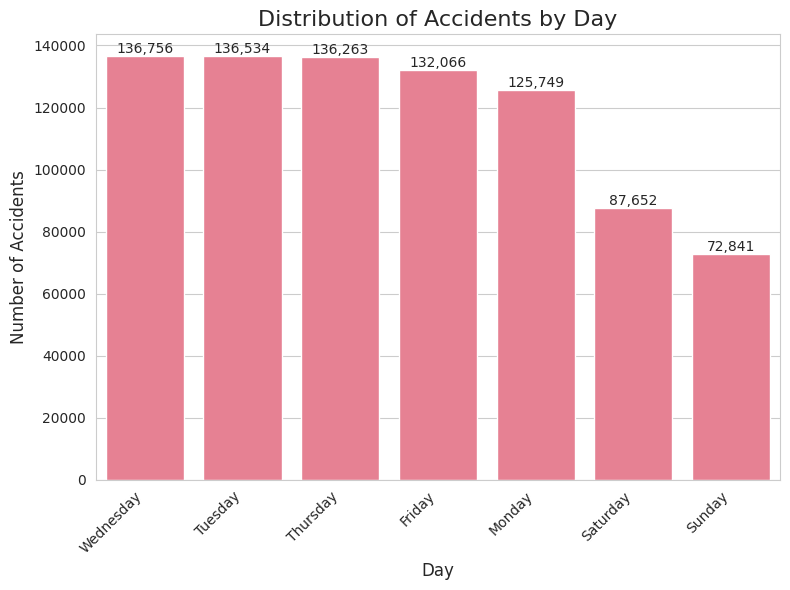

In [ ]:
# Reset the index to make 'Weather_condition' a column again
DayDF = DayDF.reset_index()

# Set the style and color palette
sns.set_style("whitegrid")
sns.set_palette("husl")

# Create the figure and axes
plt.figure(figsize=(8, 6))

# Create the bar plot
ax = sns.barplot(x='Day', y='Accident_count', data=DayDF)

# Customize the plot
plt.title('Distribution of Accidents by Day', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(DayDF['Accident_count']):
    ax.text(i, v, f'{v:,}', ha='center', va='bottom')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Create the DayDF2 DataFrame with counts of each day
DayDF2 = AccidentsDF[['Day']]
DayDF2 = DayDF2['Day'].value_counts().reset_index()
DayDF2.columns = ['Day', 'Accident_count']  # Renaming the columns for clarity

# Define the mapping of days to their sort order
day_order = {
    'Sunday': 1,
    'Monday': 2,
    'Tuesday': 3,
    'Wednesday': 4,
    'Thursday': 5,
    'Friday': 6,
    'Saturday': 7
}

# Add the sort column based on the mapping
DayDF2['sort'] = DayDF2['Day'].map(day_order)

# Sort the DataFrame by the 'sort' column in ascending order
DayDF2 = DayDF2.sort_values(by='sort', ascending=True)
DayDF2.index = DayDF2['Day']
del DayDF2['sort']
del DayDF2['Day']

# Display the sorted DataFrame
DayDF2


,Accident_count
Day,
Sunday,72841
Monday,125749
Tuesday,136534
Wednesday,136756
Thursday,136263
Friday,132066
Saturday,87652


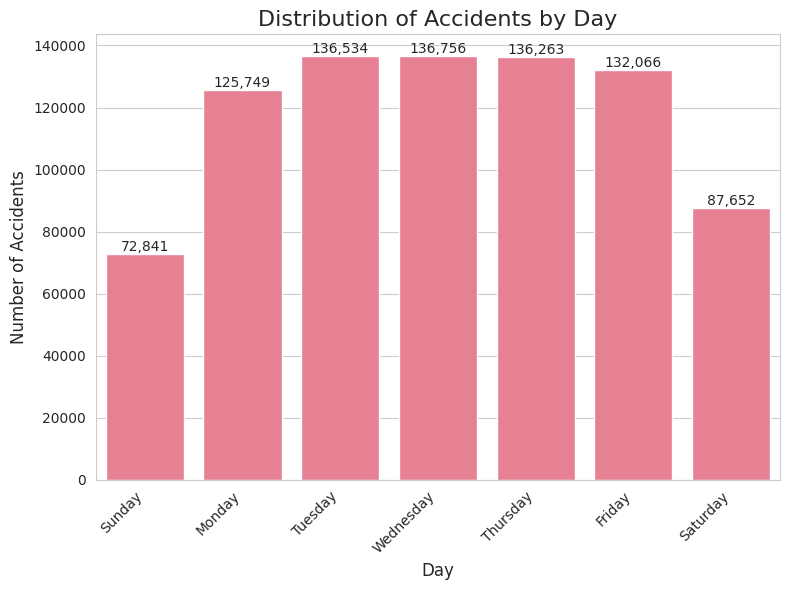

In [ ]:
# Reset the index to make 'Weather_condition' a column again
DayDF2 = DayDF2.reset_index()

# Set the style and color palette
sns.set_style("whitegrid")
sns.set_palette("husl")

# Create the figure and axes
plt.figure(figsize=(8, 6))

# Create the bar plot
ax = sns.barplot(x='Day', y='Accident_count', data=DayDF2)

# Customize the plot
plt.title('Distribution of Accidents by Day', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(DayDF2['Accident_count']):
    ax.text(i, v, f'{v:,}', ha='center', va='bottom')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

Which gender is involved in the most accidents?

In [ ]:
GenderDF = BikersDF[['Gender']]
GenderDF = GenderDF['Gender'].value_counts().reset_index()
GenderDF.columns = ['Male/Female' , 'Accident count']
GenderDF.index = GenderDF['Male/Female']
del GenderDF['Male/Female']
GenderDF


,Accident count
Male/Female,
Male,660031
Female,167721
Other,119


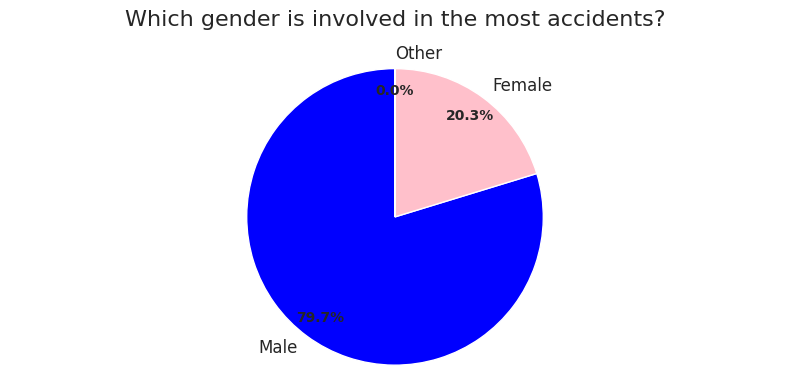

In [ ]:
# Step 1: Group smaller categories
threshold = 1.0  # Adjust this value to change what's considered a "small" category
main_categories = GenderDF[GenderDF['Accident count'] / GenderDF['Accident count'].sum() > threshold/100]
other = pd.DataFrame({'Accident count': GenderDF[GenderDF['Accident count'] / GenderDF['Accident count'].sum() <= threshold/100]['Accident count'].sum()}, index=['Other'])
grouped_df = pd.concat([main_categories, other])

# Create an improved pie chart
custom_colors = {'Male': 'blue', 'Female': 'pink', 'Other': 'gray'}
colors = [custom_colors.get(gender, 'gray') for gender in grouped_df.index]
plt.figure(figsize=(8, 4))

patches, texts, autotexts = plt.pie(grouped_df['Accident count'],
                                    labels=grouped_df.index,
                                    autopct='%1.1f%%',
                                    startangle=90,
                                    colors=colors,
                                    pctdistance=0.85)

# Enhance the appearance
plt.title('Which gender is involved in the most accidents?', fontsize=16, pad=20)
plt.setp(texts, fontsize=12)
plt.setp(autotexts, fontsize=10, weight="bold")

# Add a circle at the center to make it a donut chart (optional)
# center_circle = plt.Circle((0,0), 0.70, fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(center_circle)

plt.axis('equal')
plt.tight_layout()
plt.show()


What age is involved in the most accidents?

In [ ]:
AgeDF =BikersDF [['Age_Grp']]
AgeDF = AgeDF['Age_Grp'].value_counts().reset_index()
AgeDF.columns = ['Age group' , 'Accident count']
AgeDF.index = AgeDF['Age group']
del AgeDF['Age group']
AgeDF


,Accident count
Age group,
11 to 15,169945
26 to 35,145081
16 to 20,122604
36 to 45,103774
21 to 25,87292
46 to 55,73578
6 to 10,68021
56 to 65,41913
66 to 75,15663


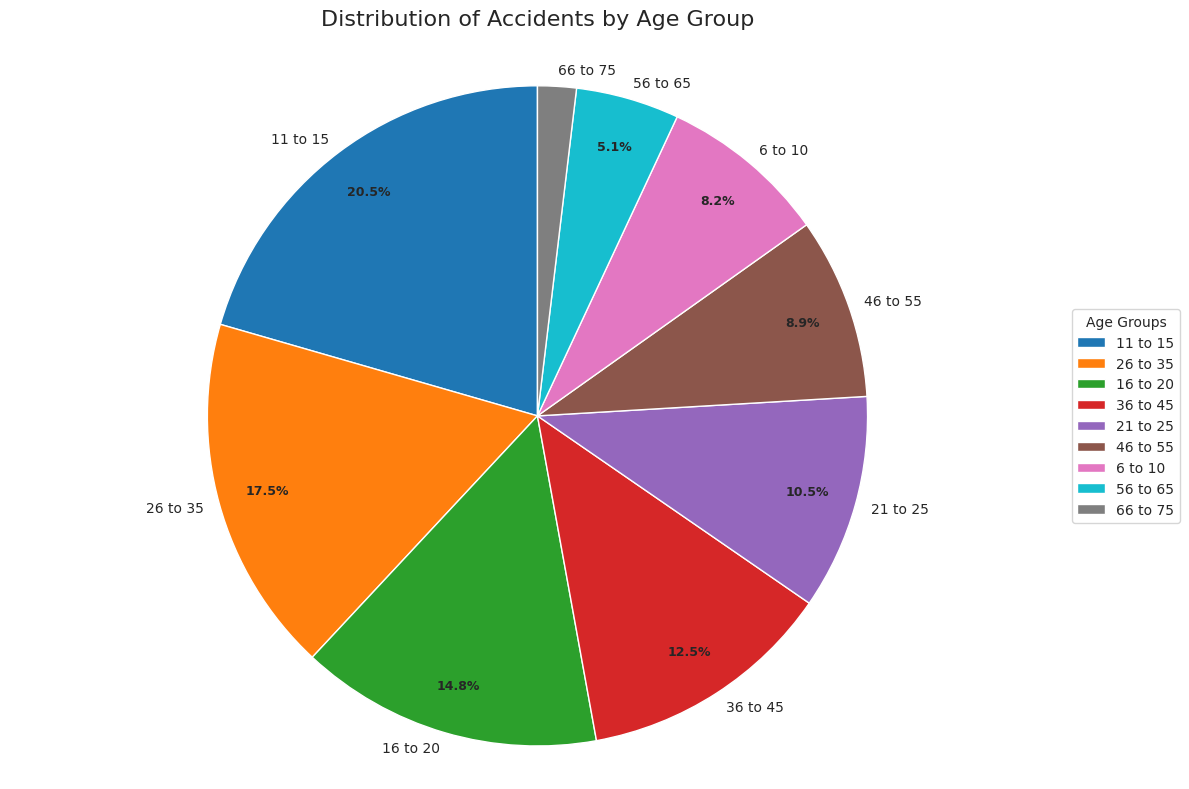

In [ ]:
# Step 1: Group smaller categories
threshold = 1.0  # Adjust this value to change what's considered a "small" category
main_categories = AgeDF[AgeDF['Accident count'] / AgeDF['Accident count'].sum() > threshold/100]
grouped_df = pd.concat([main_categories])

# Sort the DataFrame by values in descending order
grouped_df = grouped_df.sort_values('Accident count', ascending=False)

# Create an improved pie chart
custom_colors = {
    '11 to 15': '#1f77b4', '26 to 35': '#ff7f0e', '16 to 20': '#2ca02c',
    '36 to 45': '#d62728', '21 to 25': '#9467bd', '46 to 55': '#8c564b',
    '6 to 10': '#e377c2', '66 to 75': '#7f7f7f'
}
colors = [custom_colors.get(age, '#17becf') for age in grouped_df.index]

plt.figure(figsize=(12, 8))

wedges, texts, autotexts = plt.pie(grouped_df['Accident count'],
                                   labels=grouped_df.index,
                                   autopct=lambda pct: f'{pct:.1f}%' if pct > 2 else '',
                                   startangle=90,
                                   colors=colors,
                                   pctdistance=0.85,
                                   labeldistance=1.05)

# Enhance the appearance
plt.title('Distribution of Accidents by Age Group', fontsize=16, pad=20)
plt.setp(texts, fontsize=10)
plt.setp(autotexts, fontsize=9, weight="bold")

# Add a legend
plt.legend(wedges, grouped_df.index,
           title="Age Groups",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.tight_layout()
plt.show()


The distribution of injuries in men

In [ ]:
MaleSeveritydf = BikersDF[BikersDF['Gender'] == 'Male']['Severity']

MaleSeveritydf = MaleSeveritydf.value_counts().reset_index()

MaleSeveritydf.columns = ['Severity' , 'Accident count']
MaleSeveritydf.index = MaleSeveritydf['Severity']
del MaleSeveritydf['Severity']
MaleSeveritydf

,Accident count
Severity,
Slight,541783
Serious,112716
Fatal,5532


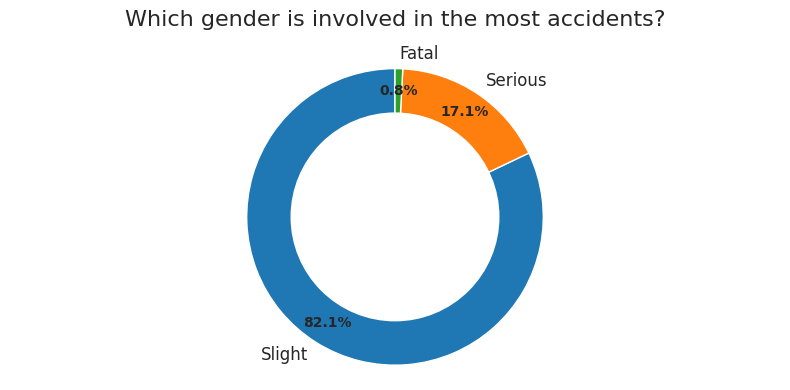

In [ ]:
# Step 1: Group smaller categories
threshold = 1.0  # Adjust this value to change what's considered a "small" category
main_categories = MaleSeveritydf[MaleSeveritydf['Accident count'] / MaleSeveritydf['Accident count'].sum() > threshold/100]
Fatal = pd.DataFrame({'Accident count': MaleSeveritydf[MaleSeveritydf['Accident count'] / MaleSeveritydf['Accident count'].sum() <= threshold/100]['Accident count'].sum()}, index=['Fatal'])
grouped_df = pd.concat([main_categories, Fatal])

# Create an improved pie chart
custom_colors = {'Slight': 'yellow', 'Serious': 'orange', 'Fatal': 'red'}
plt.figure(figsize=(8, 4))

patches, texts, autotexts = plt.pie(grouped_df['Accident count'],
                                    labels=grouped_df.index,
                                    autopct='%1.1f%%',
                                    startangle=90,
                                    colors=colors,
                                    pctdistance=0.85)

# Enhance the appearance
plt.title('Which gender is involved in the most accidents?', fontsize=16, pad=20)
plt.setp(texts, fontsize=12)
plt.setp(autotexts, fontsize=10, weight="bold")

# Add a circle at the center to make it a donut chart (optional)
center_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.axis('equal')
plt.tight_layout()
plt.show()


The distribution of injuries in women


In [ ]:
FemaleSeverityDF = BikersDF[BikersDF['Gender'] == 'Female']['Severity']

FemaleSeverityDF = FemaleSeverityDF.value_counts().reset_index()

FemaleSeverityDF.columns = ['Severity' , 'Accident count']
FemaleSeverityDF.index = FemaleSeverityDF['Severity']
del FemaleSeverityDF['Severity']
FemaleSeverityDF

,Accident count
Severity,
Slight,139679
Serious,26844
Fatal,1198


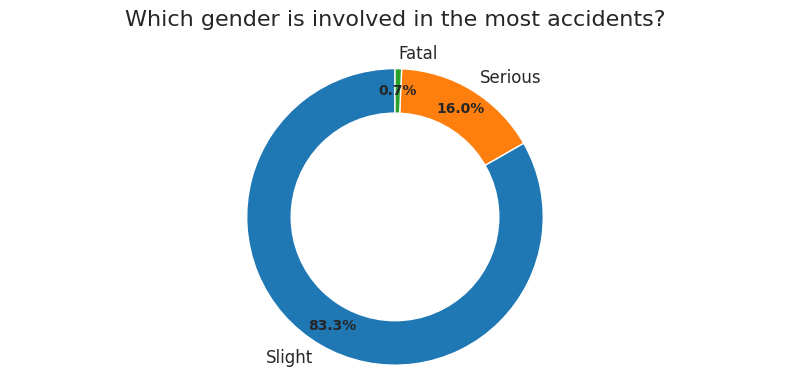

In [ ]:
# Step 1: Group smaller categories
threshold = 1.0  # Adjust this value to change what's considered a "small" category
main_categories = FemaleSeverityDF[FemaleSeverityDF['Accident count'] / FemaleSeverityDF['Accident count'].sum() > threshold/100]
Fatal = pd.DataFrame({'Accident count': FemaleSeverityDF[FemaleSeverityDF['Accident count'] / FemaleSeverityDF['Accident count'].sum() <= threshold/100]['Accident count'].sum()}, index=['Fatal'])
grouped_df = pd.concat([main_categories, Fatal])

# Create an improved pie chart
custom_colors = {'Slight': 'yellow', 'Serious': 'orange', 'Fatal': 'red'}
plt.figure(figsize=(8, 4))

patches, texts, autotexts = plt.pie(grouped_df['Accident count'],
                                    labels=grouped_df.index,
                                    autopct='%1.1f%%',
                                    startangle=90,
                                    colors=colors,
                                    pctdistance=0.85)

# Enhance the appearance
plt.title('Which gender is involved in the most accidents?', fontsize=16, pad=20)
plt.setp(texts, fontsize=12)
plt.setp(autotexts, fontsize=10, weight="bold")

# Add a circle at the center to make it a donut chart (optional)
center_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.axis('equal')
plt.tight_layout()
plt.show()


Comparing each type of injury severity between men and women

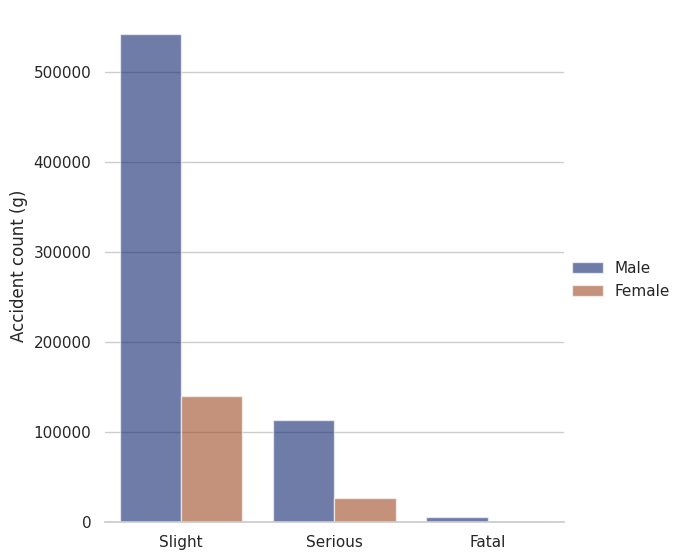

In [ ]:
sns.set_theme(style="whitegrid")
MaleSeveritydf['Gender'] = 'Male'
FemaleSeverityDF['Gender'] = 'Female'
CombinedDF = pd.concat([MaleSeveritydf, FemaleSeverityDF])

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=CombinedDF, kind="bar",
    x="Severity", y="Accident count", hue="Gender",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Accident count (g)")
g.legend.set_title("")

What is the connection between the speed of travel and the severity of the injury?

Columns in CombinedDF: Index(['Speed_category', 'Speed_accident_count', 'Severity',
       'Severity_accident_count', 'Accident_count'],
      dtype='object')

First few rows of CombinedDF:
  Speed_category  Speed_accident_count Severity  Severity_accident_count  \
0           0-10                    79   Slight                   681578   
1           0-10                    79  Serious                   139563   
2           0-10                    79    Fatal                     6730   
3          11-20                   160   Slight                   681578   
4          11-20                   160  Serious                   139563   

   Accident_count  
0        53844662  
1        11025477  
2          531670  
3       109052480  
4        22330080  


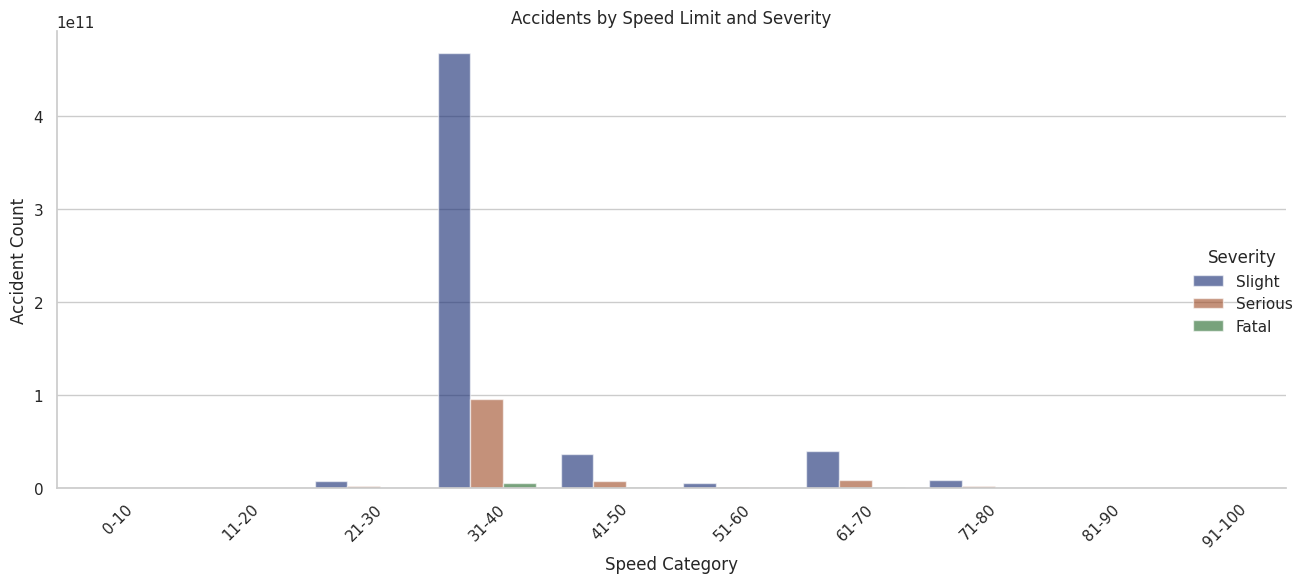

In [ ]:
# Setting the graph style
sns.set_theme(style="whitegrid")

# Create speeds categories
SpeedlimitDF = AccidentsDF[['Speed_limit']].copy()
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
SpeedlimitDF['Speed_Category'] = pd.cut(SpeedlimitDF['Speed_limit'], bins=bins, labels=labels, include_lowest=True, right=False)

# Counting accidents by speed category
SpeedlimitDF = SpeedlimitDF['Speed_Category'].value_counts().sort_index().reset_index()
SpeedlimitDF.columns = ['Speed_category', 'Speed_accident_count']

# Creating a DataFrame for accident severity
SeverityDF = BikersDF['Severity'].value_counts().reset_index()
SeverityDF.columns = ['Severity', 'Severity_accident_count']

# merging the data
CombinedDF = pd.merge(SpeedlimitDF.assign(key=1), SeverityDF.assign(key=1), on='key').drop('key', axis=1)

# Creating the Accident_count column
CombinedDF['Accident_count'] = CombinedDF['Speed_accident_count'] * CombinedDF['Severity_accident_count']

# Printing the columns and number of rows for checking
print("Columns in CombinedDF:", CombinedDF.columns)
print("\nFirst few rows of CombinedDF:")
print(CombinedDF.head())

# Creating the graph
g = sns.catplot(
    data=CombinedDF, kind="bar",
    x="Speed_category", y="Accident_count", hue="Severity",
    palette="dark", alpha=.6, height=6, aspect=2
)
g.set_axis_labels("Speed Category", "Accident Count")
g.legend.set_title("Severity")
plt.title("Accidents by Speed Limit and Severity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
sns.set_theme(style="whitegrid")

SpeedlimitDF = AccidentsDF[['Speed_limit']].copy()
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
SpeedlimitDF['Speed_Category'] = pd.cut(SpeedlimitDF['Speed_limit'], bins=bins, labels=labels, include_lowest=True, right=False)

SpeedlimitDF = SpeedlimitDF['Speed_Category'].value_counts().sort_index().reset_index()
SpeedlimitDF.columns = ['Speed_category', 'Total_accidents']

SeverityDF = BikersDF['Severity'].value_counts().reset_index()
SeverityDF.columns = ['Severity', 'Severity_count']

CombinedDF = pd.merge(SpeedlimitDF.assign(key=1), SeverityDF.assign(key=1), on='key').drop('key', axis=1)

CombinedDF['Accident_percentage'] = CombinedDF['Severity_count'] / CombinedDF['Total_accidents'] * 100

CombinedDF


/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Speed_category,Total_accidents,Severity,Severity_count,Accident_percentage
0,0-10,79,Slight,681578,8.627570e+05
1,0-10,79,Serious,139563,1.766620e+05
2,0-10,79,Fatal,6730,8.518987e+03
3,11-20,160,Slight,681578,4.259862e+05
4,11-20,160,Serious,139563,8.722688e+04
5,11-20,160,Fatal,6730,4.206250e+03
6,21-30,10847,Slight,681578,6.283562e+03
7,21-30,10847,Serious,139563,1.286651e+03
8,21-30,10847,Fatal,6730,6.204481e+01
9,31-40,686817,Slight,681578,9.923721e+01


Accident Severity Percentage by Speed Category

<ipython-input-41-e50c8b7e4b07>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  CombinedDF = MergedDF.groupby(['Speed_Category', 'Severity']).size().reset_index(name='Accident_count')
<ipython-input-41-e50c8b7e4b07>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  speed_totals = CombinedDF.groupby('Speed_Category')['Accident_count'].sum().reset_index(name='Total_accidents')


   Speed_Category Severity  Accident_count  Total_accidents  \
0            0-10    Fatal               0               79   
1            0-10  Serious              14               79   
2            0-10   Slight              65               79   
3           11-20    Fatal               1              160   
4           11-20  Serious              28              160   
5           11-20   Slight             131              160   
6           21-30    Fatal              27            10847   
7           21-30  Serious            1659            10847   
8           21-30   Slight            9161            10847   
9           31-40    Fatal            3099           686817   
10          31-40  Serious          104241           686817   
11          31-40   Slight          579477           686817   
12          41-50    Fatal             712            53343   
13          41-50  Serious           11004            53343   
14          41-50   Slight           41627            5

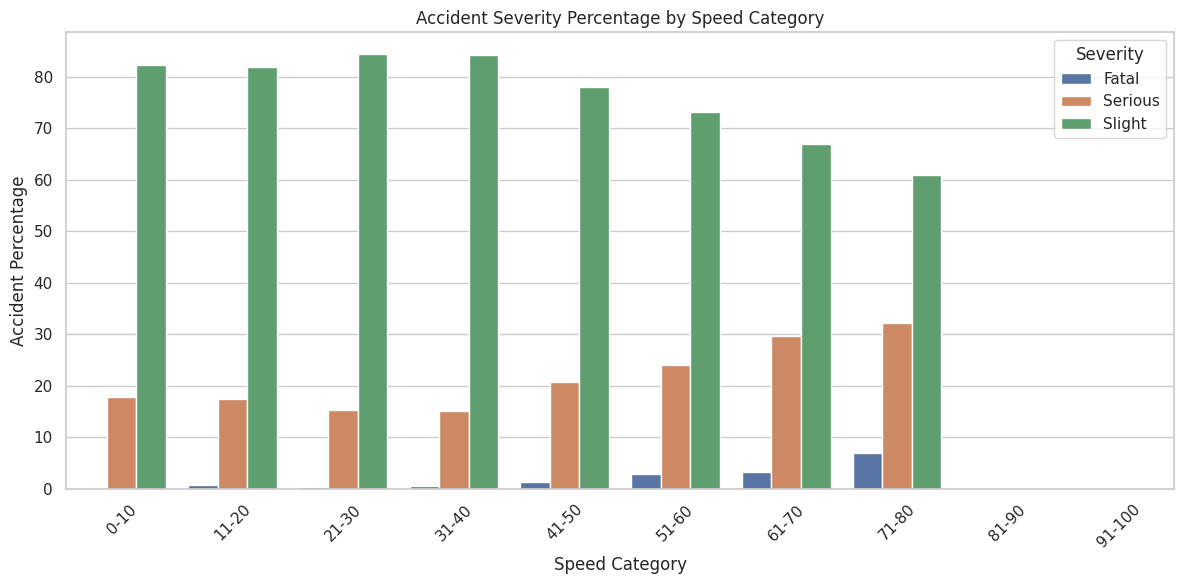

In [ ]:
# Setting the graph style
sns.set_theme(style="whitegrid")

# Creating speeds categories in AccidentsDF
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
AccidentsDF['Speed_Category'] = pd.cut(AccidentsDF['Speed_limit'], bins=bins, labels=labels, include_lowest=True, right=False)

# Merger of AccidentsDF and BikersDF
MergedDF = pd.merge(AccidentsDF[['Speed_Category']], BikersDF[['Severity']], left_index=True, right_index=True)

# Counting accidents by speed and severity category
CombinedDF = MergedDF.groupby(['Speed_Category', 'Severity']).size().reset_index(name='Accident_count')

# Calculation of total accidents for each speed category
speed_totals = CombinedDF.groupby('Speed_Category')['Accident_count'].sum().reset_index(name='Total_accidents')

# Merging with the original DataFrame
CombinedDF = pd.merge(CombinedDF, speed_totals, on='Speed_Category')

# Calculating the percentage of each hardware within each speed category
CombinedDF['Accident_percentage'] = CombinedDF['Accident_count'] / CombinedDF['Total_accidents'] * 100

# Sort the results
CombinedDF = CombinedDF.sort_values(['Speed_Category', 'Severity'])

print(CombinedDF)

# Creating the graph
plt.figure(figsize=(12, 6))
sns.barplot(x='Speed_Category', y='Accident_percentage', hue='Severity', data=CombinedDF)
plt.title('Accident Severity Percentage by Speed Category')
plt.xlabel('Speed Category')
plt.ylabel('Accident Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gender based comparasing

Severity precentage based on gender:

In [ ]:
# Merge the datasets
merged_df = pd.merge(AccidentsDF, BikersDF, left_index=True, right_index=True)

# Group the data by gender and severity, and count the occurrences
grouped = merged_df.groupby(['Gender', 'Severity']).size().unstack(fill_value=0)

# Calculate the percentages
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Reset the index to make Gender a column
result_df = percentages.reset_index()

# Rename the columns for clarity
result_df.columns.name = None
result_df = result_df.rename(columns={'Gender': 'Gender', 'Fatal': 'Fatal (%)', 'Serious': 'Serious (%)', 'Slight': 'Slight (%)'})

# Round the percentages to two decimal places
result_df = result_df.round(2)

# Display the result
print(result_df)

   Gender  Fatal (%)  Serious (%)  Slight (%)
0  Female       0.71        16.01       83.28
1    Male       0.84        17.08       82.08
2   Other       0.00         2.52       97.48


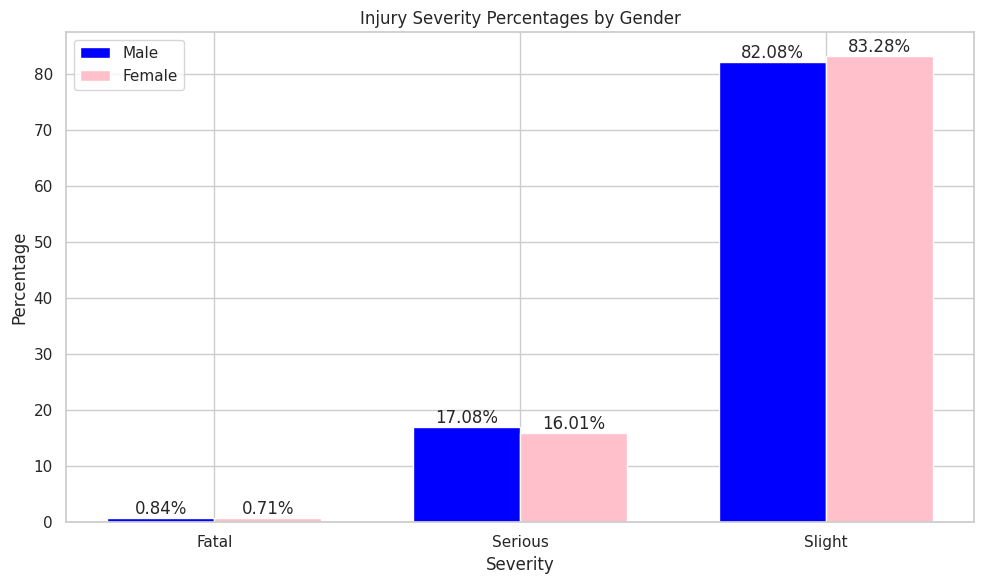

In [ ]:
# Filter out the 'Other' category
result_df_filtered = result_df[result_df['Gender'] != 'Other']

# Set up the data for plotting
severities = ['Fatal (%)', 'Serious (%)', 'Slight (%)']
male_data = result_df_filtered[result_df_filtered['Gender'] == 'Male'][severities].values[0]
female_data = result_df_filtered[result_df_filtered['Gender'] == 'Female'][severities].values[0]

# Set up the bar positions
bar_width = 0.35
r1 = range(len(severities))
r2 = [x + bar_width for x in r1]

# Create the plot
plt.figure(figsize=(10, 6))
male_bars = plt.bar(r1, male_data, color='blue', width=bar_width, label='Male')
female_bars = plt.bar(r2, female_data, color='pink', width=bar_width, label='Female')

# Add labels and title
plt.xlabel('Severity')
plt.ylabel('Percentage')
plt.title('Injury Severity Percentages by Gender')
plt.xticks([r + bar_width/2 for r in range(len(severities))], [s.replace(' (%)', '') for s in severities])

# Add a legend
plt.legend()

# Add percentage labels on top of each bar
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                 f'{height:.2f}%', ha='center', va='bottom')

add_labels(male_bars)
add_labels(female_bars)

# Show the plot
plt.tight_layout()
plt.show()

Speed limit precentage based on gender:

In [ ]:
# Merge the datasets
merged_df = pd.merge(AccidentsDF, BikersDF, left_index=True, right_index=True)

# Function to categorize speed limits
def categorize_speed(speed):
    if speed <= 20:
        return '0-20'
    elif 21 <= speed <= 40:
        return '21-40'
    elif 41 <= speed <= 60:
        return '41-60'
    elif 61 <= speed <= 80:
        return '61-80'
    elif 81 <= speed <= 100:
        return '81-100'
    else:
        return '100+'

# Apply the categorization
merged_df['Speed_Category'] = merged_df['Speed_limit'].apply(categorize_speed)

# Group the data by gender and speed category, and count the occurrences
grouped = merged_df.groupby(['Gender', 'Speed_Category']).size().unstack(fill_value=0)

# Calculate the percentages
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Reset the index to make Gender a column
result_df = percentages.reset_index()

# Rename the columns for clarity
result_df.columns.name = None
result_df = result_df.rename(columns={'Gender': 'Gender'})

# Ensure all categories are present, even if they have 0%
all_categories = ['0-20', '21-40', '41-60', '61-80', '81-100', '100+']
for category in all_categories:
    if category not in result_df.columns:
        result_df[category] = 0.0

# Reorder columns
result_df = result_df[['Gender'] + all_categories]

# Round the percentages to two decimal places
result_df = result_df.round(2)

# Display the result
print(result_df)

   Gender  0-20  21-40  41-60  61-80  81-100  100+
0  Female  1.69  90.88   6.57   0.86     0.0   0.0
1    Male  1.25  89.03   8.21   1.51     0.0   0.0
2   Other  1.68  93.28   3.36   1.68     0.0   0.0


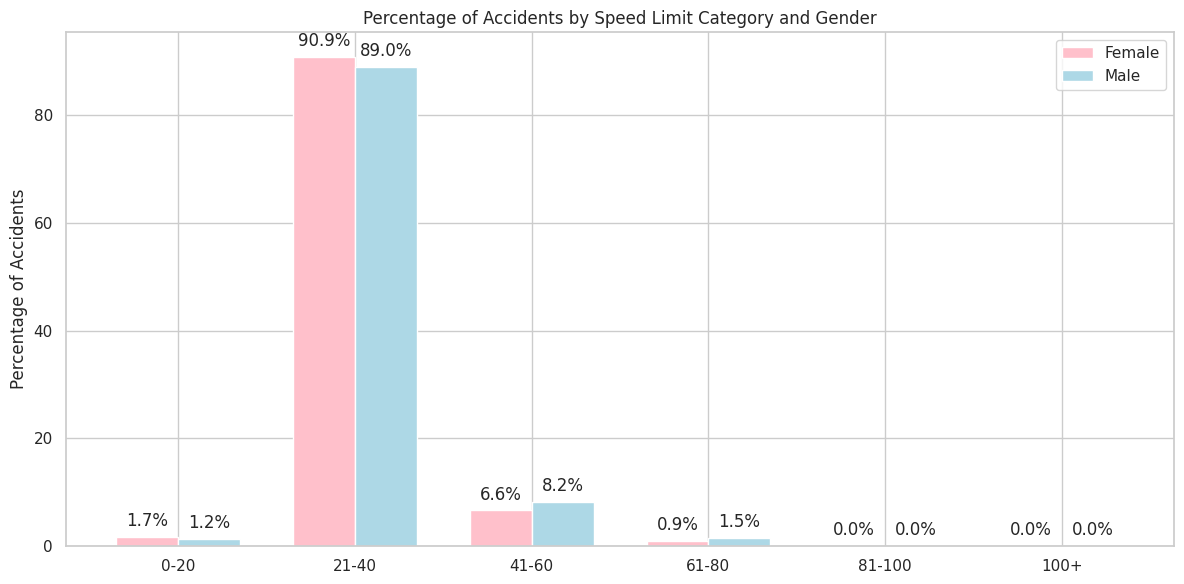

In [ ]:
# Filter out the 'Other' category if it exists
result_df = result_df[result_df['Gender'].isin(['Male', 'Female'])]

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Set the width of each bar and the positions of the bars
width = 0.35
x = np.arange(len(all_categories))

# Create the bars for each gender
female_data = result_df[result_df['Gender'] == 'Female'].iloc[0, 1:].values
male_data = result_df[result_df['Gender'] == 'Male'].iloc[0, 1:].values

ax.bar(x - width/2, female_data, width, label='Female', color='pink')
ax.bar(x + width/2, male_data, width, label='Male', color='lightblue')

# Customize the plot
ax.set_ylabel('Percentage of Accidents')
ax.set_title('Percentage of Accidents by Speed Limit Category and Gender')
ax.set_xticks(x)
ax.set_xticklabels(all_categories)
ax.legend()

# Add value labels on top of each bar
def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        label = f"{y_value:.1f}%"

        ax.annotate(label, (x_value, y_value), xytext=(0, spacing),
                    textcoords="offset points", ha='center', va='bottom')

add_value_labels(ax)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Age group precentage per gender

In [ ]:
# Group the data by gender and age group, and count the occurrences
grouped = BikersDF.groupby(['Gender', 'Age_Grp']).size().unstack(fill_value=0)

# Calculate the percentages
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Reset the index to make Gender a column
result_df = percentages.reset_index()

# Round the percentages to two decimal places
result_df = result_df.round(2)

# Get the list of column names
columns = result_df.columns.tolist()

# Remove 'Gender' from the list (we'll add it back at the start)
columns.remove('Gender')

# Move '6 to 10' to the start of the age groups
columns.remove('6 to 10')
columns = ['Gender', '6 to 10'] + columns

# Reorder the DataFrame
result_df = result_df[columns]

# Display the result
print(result_df)

# Verify the new column order
print("\nNew column names:")
print(result_df.columns)

Age_Grp  Gender  6 to 10  11 to 15  16 to 20  21 to 25  26 to 35  36 to 45  \
0        Female     7.01     15.39     13.51     13.36     19.50     12.86   
1          Male     8.52     21.83     15.14      9.83     17.02     12.45   
2         Other    23.53     22.69     18.49      6.72      7.56      8.40   

Age_Grp  46 to 55  56 to 65  66 to 75  
0           10.33      6.04      2.01  
1            8.52      4.81      1.86  
2            5.04      5.04      2.52  

New column names:
Index(['Gender', '6 to 10', '11 to 15', '16 to 20', '21 to 25', '26 to 35',
       '36 to 45', '46 to 55', '56 to 65', '66 to 75'],
      dtype='object', name='Age_Grp')


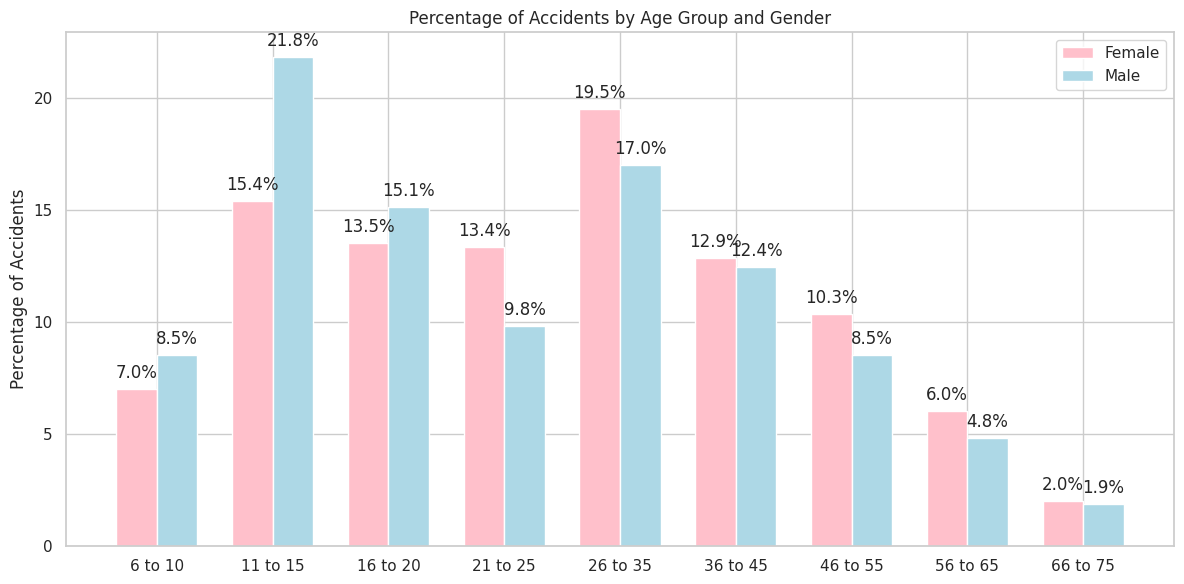

In [ ]:
# Filter out any non-gender categories if they exist
result_df = result_df[result_df['Gender'].isin(['Male', 'Female'])]

# Get the age group categories
age_groups = result_df.columns[1:].tolist()

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Set the width of each bar and the positions of the bars
width = 0.35
x = np.arange(len(age_groups))

# Create the bars for each gender
female_data = result_df[result_df['Gender'] == 'Female'].iloc[0, 1:].values
male_data = result_df[result_df['Gender'] == 'Male'].iloc[0, 1:].values

ax.bar(x - width/2, female_data, width, label='Female', color='pink')
ax.bar(x + width/2, male_data, width, label='Male', color='lightblue')

# Customize the plot
ax.set_ylabel('Percentage of Accidents')
ax.set_title('Percentage of Accidents by Age Group and Gender')
ax.set_xticks(x)
ax.set_xticklabels(age_groups)
ax.legend()

# Add value labels on top of each bar
def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        label = f"{y_value:.1f}%"

        ax.annotate(label, (x_value, y_value), xytext=(0, spacing),
                    textcoords="offset points", ha='center', va='bottom')

add_value_labels(ax)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#Dividing the accidents to categories

Trend in the number of bicycle accidents over the years

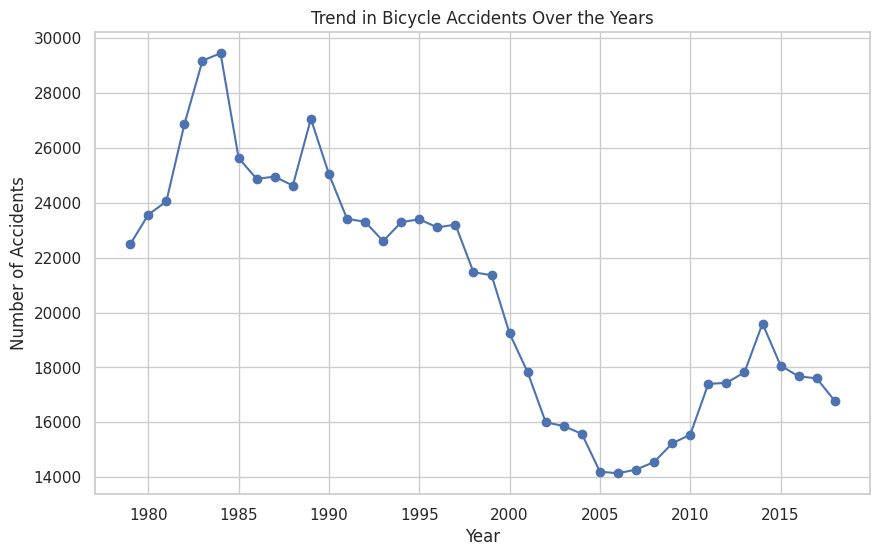

In [ ]:
# Convert 'Date' column to datetime if it's not already
AccidentsDF['Date'] = pd.to_datetime(AccidentsDF['Date'])

# Extract year from the 'Date' column and count accidents for each year
yearly_accidents = AccidentsDF['Date'].dt.year.value_counts().sort_index()

# Create a line plot to visualize the trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_accidents.index, yearly_accidents.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Trend in Bicycle Accidents Over the Years')
plt.grid(True)
plt.show()

Number of bicycle accidents by region

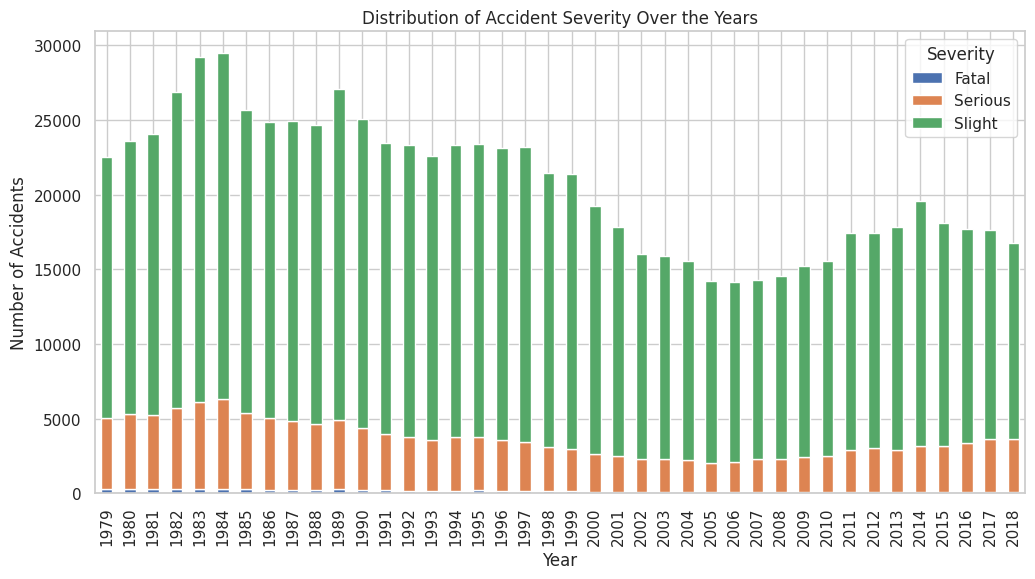

In [ ]:
# Convert 'Date' column to datetime if it's not already
AccidentsDF['Date'] = pd.to_datetime(AccidentsDF['Date'])

# Extract year and merge with severity
yearly_severity = AccidentsDF[['Date']].copy()
yearly_severity['Year'] = yearly_severity['Date'].dt.year
yearly_severity = yearly_severity.merge(BikersDF['Severity'], left_index=True, right_index=True)

# Group by year and severity, then count occurrences
severity_counts = yearly_severity.groupby(['Year', 'Severity']).size().unstack(fill_value=0)

# Plot the distribution
severity_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Accident Severity Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity')
plt.grid(True)
plt.show()


Seasonal patterns in bicycle accidents

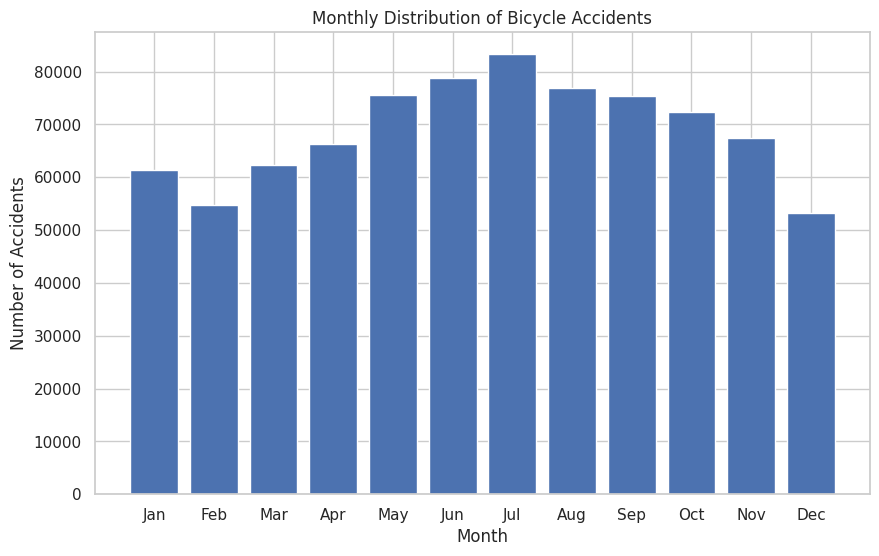

In [ ]:
# Extract month from the 'Date' column and count accidents for each month
monthly_accidents = AccidentsDF['Date'].dt.month.value_counts().sort_index()

# Create a bar plot to visualize the monthly distribution
plt.figure(figsize=(10, 6))
plt.bar(monthly_accidents.index, monthly_accidents.values)
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Monthly Distribution of Bicycle Accidents')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


 Time of day effect on bicycle accidents

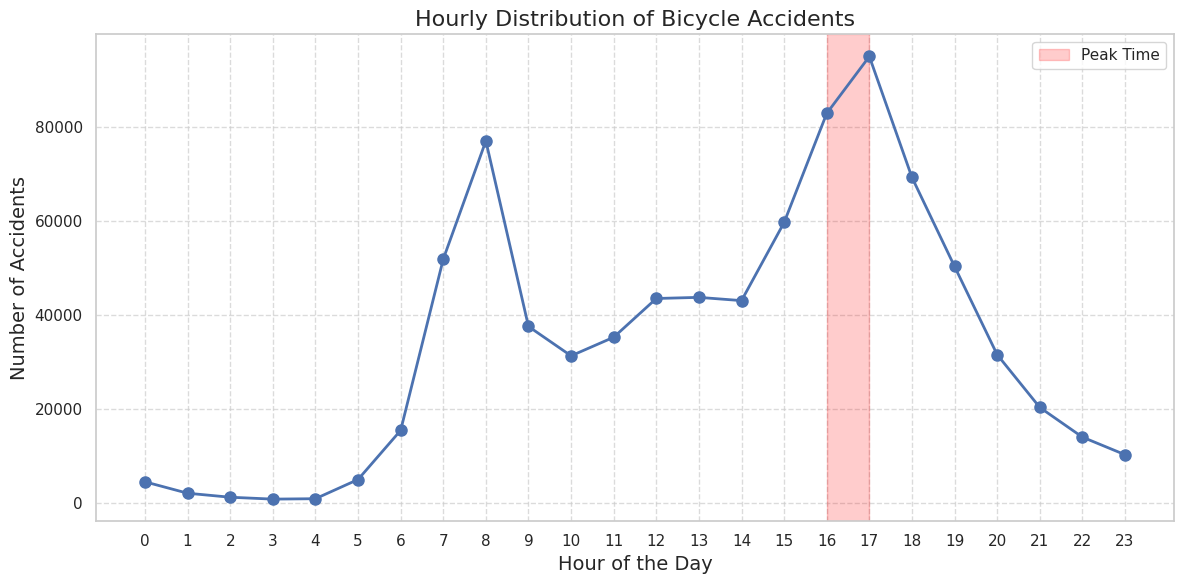

In [ ]:
# Extract hour from the 'Time' column and count accidents for each hour
AccidentsDF['Time'] = pd.to_datetime(AccidentsDF['Time'], format='%H:%M')
hourly_accidents = AccidentsDF['Time'].dt.hour.value_counts().sort_index()

# Create a more stylish line plot with markers
plt.figure(figsize=(12, 6))
plt.plot(hourly_accidents.index, hourly_accidents.values, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)

# Set title and labels with increased font size
plt.title('Hourly Distribution of Bicycle Accidents', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)

# Customize grid and ticks
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(24))  # Show all hours on the x-axis

# Add a peak time highlight (example)
peak_start, peak_end = 16, 17  # Adjust as needed
plt.axvspan(peak_start, peak_end, color='red', alpha=0.2, label='Peak Time')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Age of cyclist vs. severity of the accident

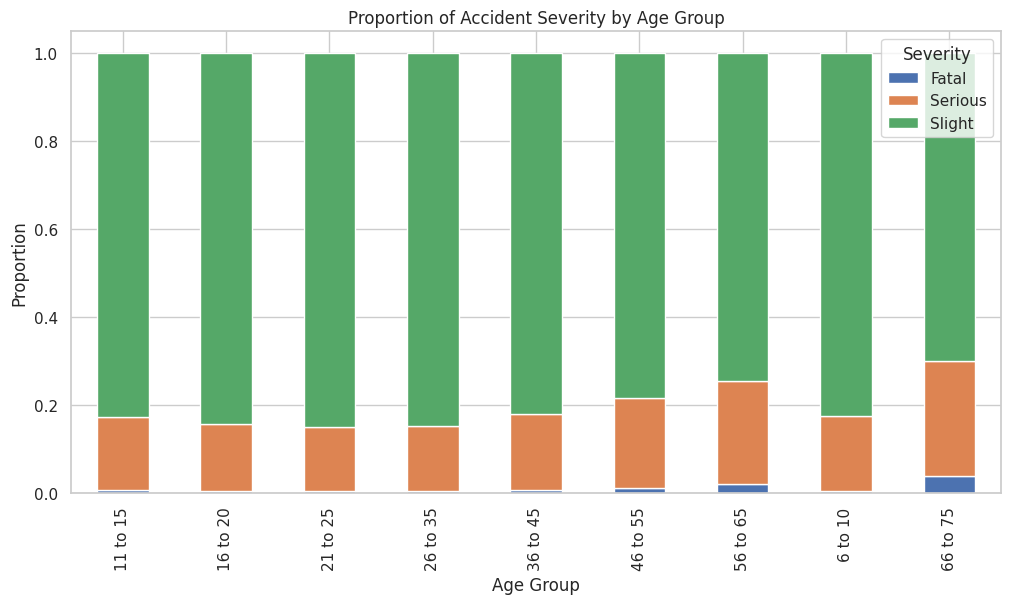

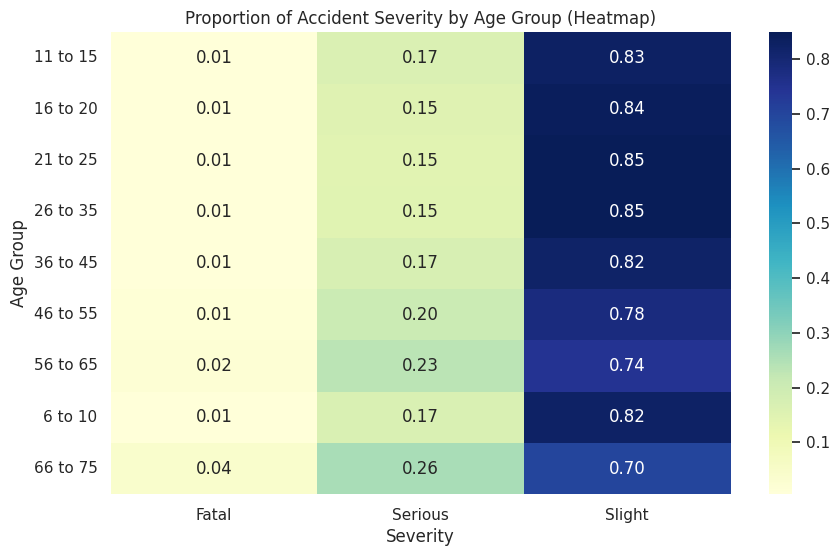

In [ ]:
# Group the data by age group and severity, and count the occurrences
grouped = BikersDF.groupby(['Age_Grp', 'Severity']).size().unstack(fill_value=0)

# Normalize the counts to get proportions within each age group
proportions = grouped.div(grouped.sum(axis=1), axis=0)

# Stacked bar chart
proportions.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Proportion of Accident Severity by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Severity')
plt.show()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(proportions, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Proportion of Accident Severity by Age Group (Heatmap)')
plt.xlabel('Severity')
plt.ylabel('Age Group')
plt.show()


Is there a connection between the hours of the day and the hours of the night and the number of accidents?

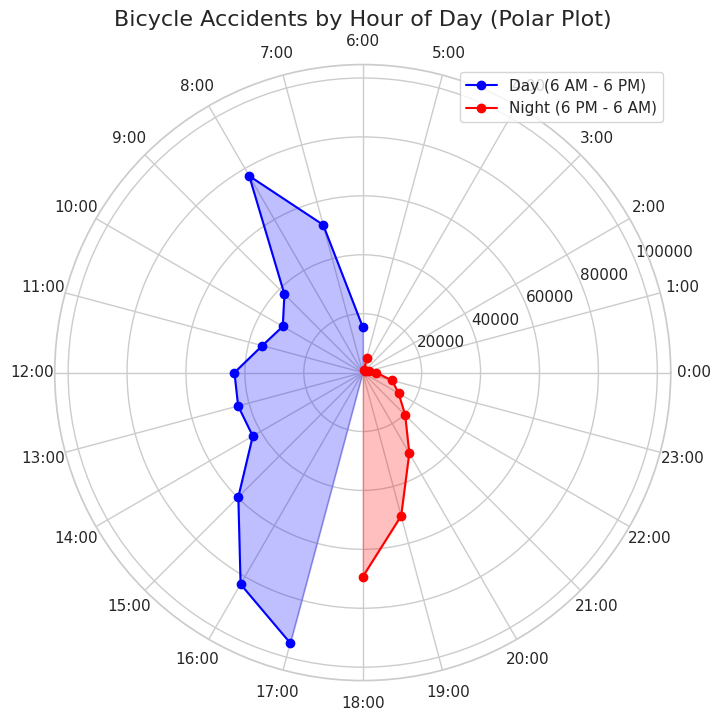

In [ ]:
# Extract hour from the 'Time' column and count accidents for each hour
AccidentsDF['Time'] = pd.to_datetime(AccidentsDF['Time'], format='%H:%M')
hourly_accidents = AccidentsDF['Time'].dt.hour.value_counts().sort_index()

# Separate day and night hours
day_hours = hourly_accidents.loc[hourly_accidents.index.isin(range(6, 18))]
night_hours = hourly_accidents.loc[~hourly_accidents.index.isin(range(6, 18))]

# Create a polar plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='polar')

# Angles for each hour (in radians)
theta = np.linspace(0, 2*np.pi, 24, endpoint=False)

# Plot day hours (6 AM - 6 PM)
ax.plot(theta[6:18], day_hours.values, color='blue', marker='o', linestyle='-', label='Day (6 AM - 6 PM)')
ax.fill_between(theta[6:18], day_hours.values, alpha=0.25, color='blue')

# Plot night hours (6 PM - 6 AM)
night_hours_extended = np.concatenate((night_hours.values[-6:], night_hours.values[:6]))
ax.plot(np.concatenate((theta[18:], theta[:6])), night_hours_extended, color='red', marker='o', linestyle='-', label='Night (6 PM - 6 AM)')
ax.fill_between(np.concatenate((theta[18:], theta[:6])), night_hours_extended, alpha=0.25, color='red')

# Set labels and title
ax.set_xticks(theta)
ax.set_xticklabels([f"{i}:00" for i in range(24)])
ax.set_ylim(0, max(day_hours.max(), night_hours.max()) * 1.1)
ax.grid(True)
plt.rcParams.update({'font.size': 12})
ax.set_title('Bicycle Accidents by Hour of Day (Polar Plot)', fontsize=16)
plt.legend()
plt.show()


<ipython-input-42-4cd5905173d5>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = merged_df.groupby(['Age_Grp', 'Gender', 'Weather_conditions', 'TimeOfDay'])['Severity'].mean().unstack(level=['Weather_conditions', 'TimeOfDay'])


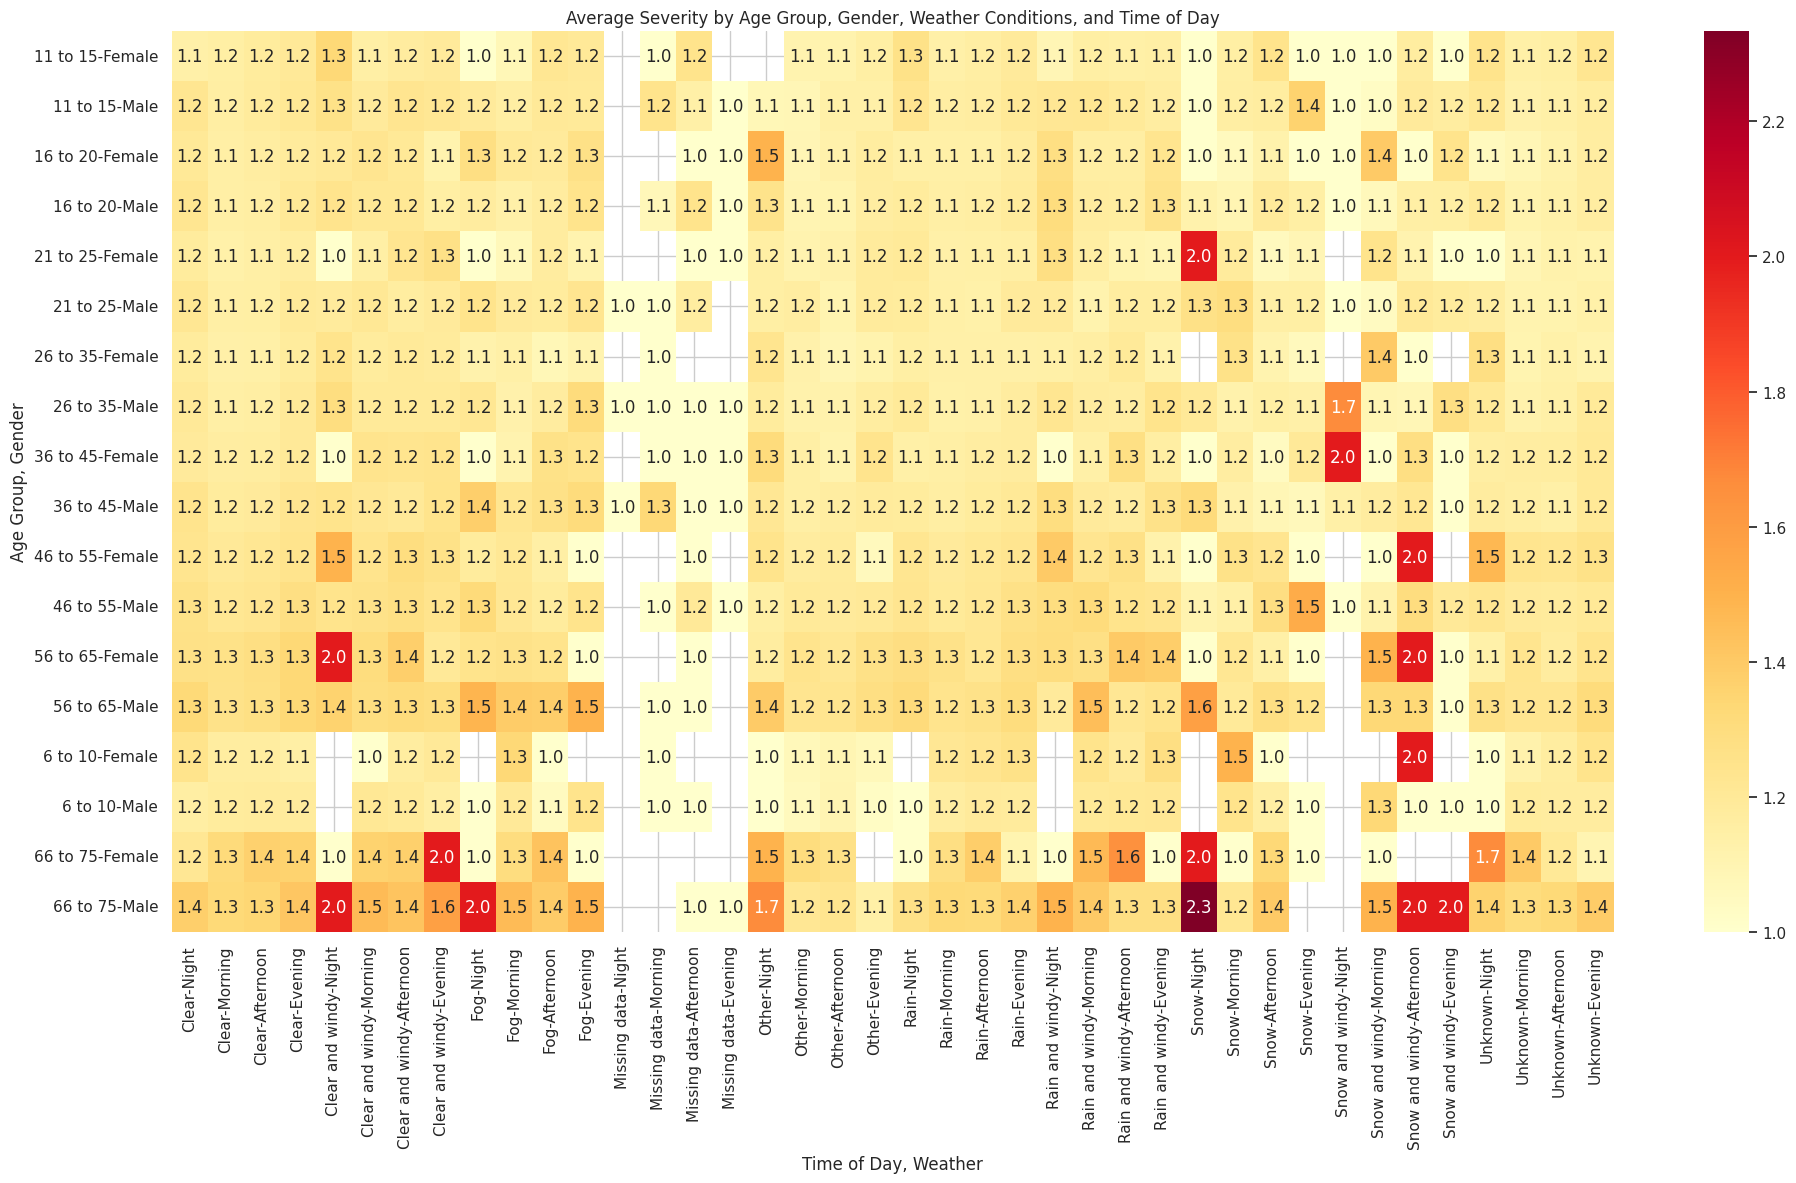

Chi-squared test for Age_Grp and Gender:
p-value: 0.0
Chi-squared statistic: 6280.251093095315
--------------------
Chi-squared test for Age_Grp and Weather_conditions:
p-value: 0.0
Chi-squared statistic: 5975.17680009583
--------------------
Chi-squared test for Age_Grp and TimeOfDay:
p-value: 0.0
Chi-squared statistic: 34923.45294002507
--------------------
Chi-squared test for Age_Grp and Severity:
p-value: 0.0
Chi-squared statistic: 7370.699116061312
--------------------
Chi-squared test for Gender and Weather_conditions:
p-value: 6.438245263932563e-20
Chi-squared statistic: 111.76082646761859
--------------------
Chi-squared test for Gender and TimeOfDay:
p-value: 0.0
Chi-squared statistic: 3286.755469054905
--------------------
Chi-squared test for Gender and Severity:
p-value: 4.823595380622614e-31
Chi-squared statistic: 139.61323660646073
--------------------
Chi-squared test for Weather_conditions and TimeOfDay:
p-value: 0.0
Chi-squared statistic: 4004.0822137955493
----------

In [ ]:
# merging the data
merged_df = pd.merge(AccidentsDF, BikersDF, left_index=True, right_index=True)

# Filtering the 'Other' values ​​from the gender column
merged_df = merged_df[merged_df['Gender'] != 'Other']

# Convert Severity column to numbers
severity_map = {'Slight': 1, 'Serious': 2, 'Fatal': 3}
merged_df['Severity'] = merged_df['Severity'].map(severity_map)

# Creating time categories
merged_df['Hour'] = pd.to_datetime(merged_df['Time']).dt.hour
merged_df['TimeOfDay'] = pd.cut(merged_df['Hour'],
                                bins=[0, 6, 12, 18, 24],
                                labels=['Night', 'Morning', 'Afternoon', 'Evening'])

# analysis
result = merged_df.groupby(['Age_Grp', 'Gender', 'Weather_conditions', 'TimeOfDay'])['Severity'].mean().unstack(level=['Weather_conditions', 'TimeOfDay'])

# Creating the graph
plt.figure(figsize=(20, 12))
sns.heatmap(result, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Average Severity by Age Group, Gender, Weather Conditions, and Time of Day')
plt.xlabel('Time of Day, Weather')
plt.ylabel('Age Group, Gender')
plt.tight_layout()
plt.show()

# Statistical analysis
def analyze_factors(data, factor1, factor2):
    contingency = pd.crosstab(data[factor1], data[factor2])
    chi2, p, dof, expected = stats.chi2_contingency(contingency)
    print(f"Chi-squared test for {factor1} and {factor2}:")
    print(f"p-value: {p}")
    print(f"Chi-squared statistic: {chi2}")
    print("--------------------")

factors = ['Age_Grp', 'Gender', 'Weather_conditions', 'TimeOfDay', 'Severity']
for i in range(len(factors)):
    for j in range(i+1, len(factors)):
        analyze_factors(merged_df, factors[i], factors[j])

# Print additional information for review
print("Unique values in Gender:", merged_df['Gender'].unique())
print("\nData types of columns:")
print(merged_df.dtypes)
print("\nMissing values:")
print(merged_df.isnull().sum())
print("\nTotal number of records:", len(merged_df))

<ipython-input-39-a0dea16949e5>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.heatmap(merged_df.groupby(['Speed_Limit_Cat', 'Vehicle_Count_Cat', 'Day_Num'])['Severity'].mean().unstack(level=['Day_Num']),


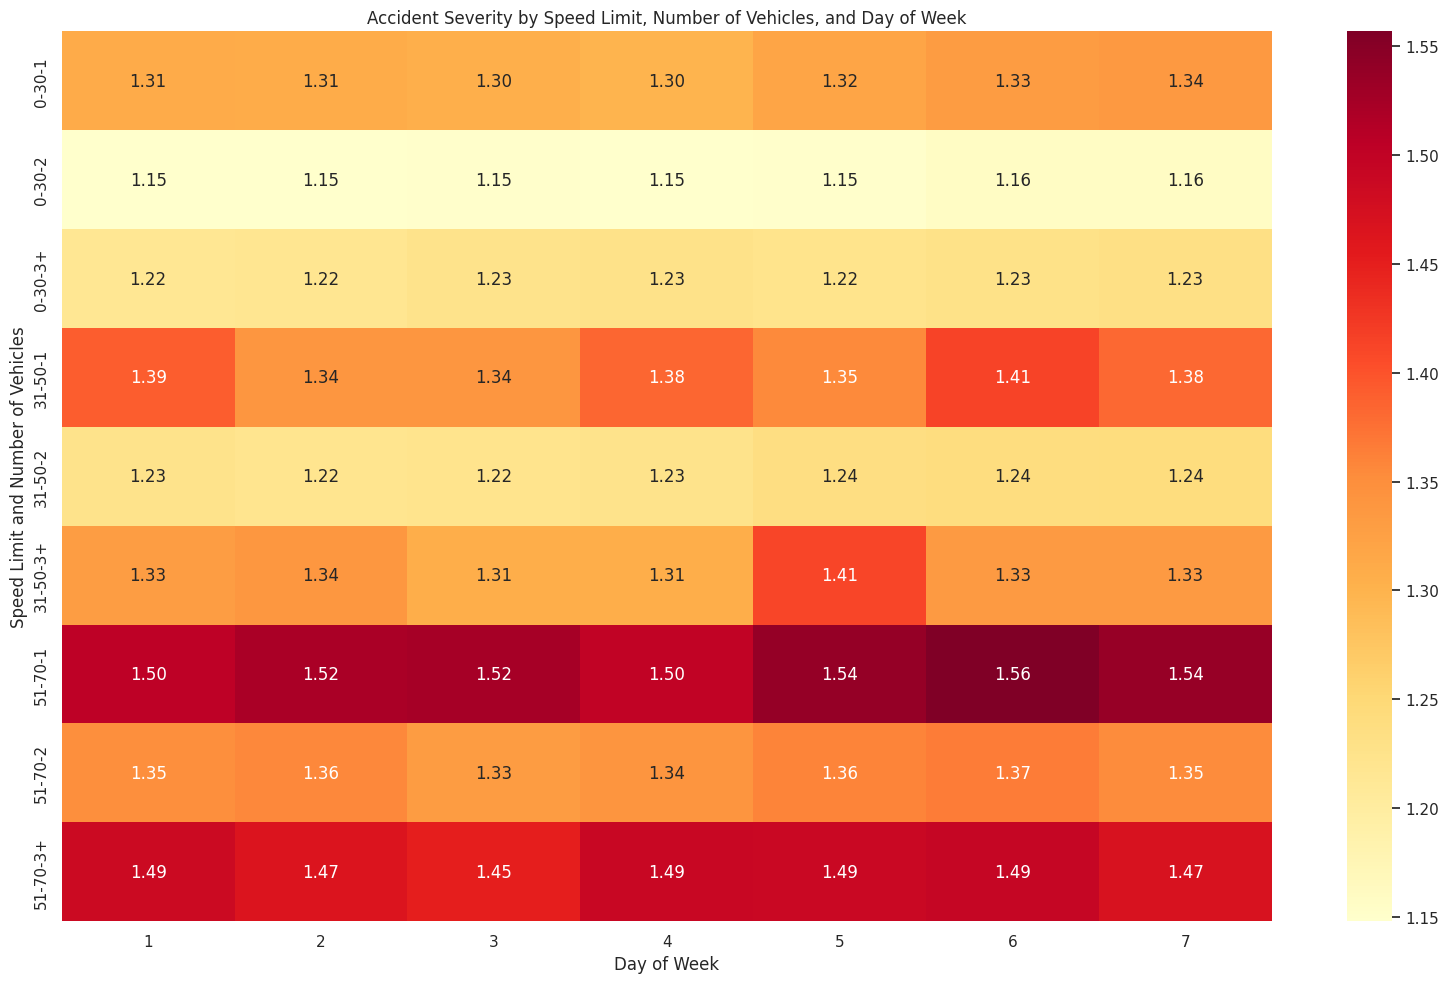

Chi-square test for Speed_Limit_Cat and Vehicle_Count_Cat:
p-value: 0.0
Chi-squared statistic: 7636.747751499492
--------------------
Chi-square test for Speed_Limit_Cat and Day_Num:
p-value: 3.572018614457031e-306
Chi-squared statistic: 1463.0256777355594
--------------------
Chi-square test for Speed_Limit_Cat and Severity:
p-value: 0.0
Chi-squared statistic: 21243.83889173288
--------------------
Chi-square test for Vehicle_Count_Cat and Day_Num:
p-value: 1.8255622379721579e-125
Chi-squared statistic: 622.3026003719319
--------------------
Chi-square test for Vehicle_Count_Cat and Severity:
p-value: 0.0
Chi-squared statistic: 10636.684444501067
--------------------
Chi-square test for Day_Num and Severity:
p-value: 3.009716701832088e-60
Chi-squared statistic: 315.1960700916592
--------------------

Unique values in Speed Limit categories:
Speed_Limit_Cat
0-30     697802
51-70     69938
31-50     60052
Name: count, dtype: int64

Unique values in Vehicle Count categories:
Vehicle_Coun

In [ ]:
# Merging the data
merged_df = pd.merge(AccidentsDF, BikersDF, left_index=True, right_index=True)

# Converting Severity to numbers
severity_map = {'Slight': 1, 'Serious': 2, 'Fatal': 3}
merged_df['Severity'] = merged_df['Severity'].map(severity_map)

# Creating categories for speed limit
merged_df['Speed_Limit_Cat'] = pd.cut(merged_df['Speed_limit'],
                                      bins=[0, 30, 50, 70],
                                      labels=['0-30', '31-50', '51-70'])

# Creating categories for number of vehicles
merged_df['Vehicle_Count_Cat'] = pd.cut(merged_df['Number_of_Vehicles'],
                                        bins=[0, 1, 2, np.inf],
                                        labels=['1', '2', '3+'])

# Converting day of the week to number (1-7)
merged_df['Day_Num'] = pd.to_datetime(merged_df['Date']).dt.dayofweek + 1

# Creating the graph
plt.figure(figsize=(16, 10))
sns.heatmap(merged_df.groupby(['Speed_Limit_Cat', 'Vehicle_Count_Cat', 'Day_Num'])['Severity'].mean().unstack(level=['Day_Num']),
            annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Accident Severity by Speed Limit, Number of Vehicles, and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Speed Limit and Number of Vehicles')
plt.tight_layout()
plt.show()

# Statistical analysis
def analyze_factors(data, factor1, factor2):
    contingency = pd.crosstab(data[factor1], data[factor2])
    chi2, p, dof, expected = stats.chi2_contingency(contingency)
    print(f"Chi-square test for {factor1} and {factor2}:")
    print(f"p-value: {p}")
    print(f"Chi-squared statistic: {chi2}")
    print("--------------------")

factors = ['Speed_Limit_Cat', 'Vehicle_Count_Cat', 'Day_Num', 'Severity']
for i in range(len(factors)):
    for j in range(i+1, len(factors)):
        analyze_factors(merged_df, factors[i], factors[j])

# Printing additional information for verification
print("\nUnique values in Speed Limit categories:")
print(merged_df['Speed_Limit_Cat'].value_counts())
print("\nUnique values in Vehicle Count categories:")
print(merged_df['Vehicle_Count_Cat'].value_counts())
print("\nUnique values in Days of Week:")
print(merged_df['Day_Num'].value_counts().sort_index())
print("\nData types of columns:")
print(merged_df[['Speed_Limit_Cat', 'Vehicle_Count_Cat', 'Day_Num', 'Severity']].dtypes)
print("\nMissing values:")
print(merged_df[['Speed_Limit_Cat', 'Vehicle_Count_Cat', 'Day_Num', 'Severity']].isnull().sum())
print("\nTotal number of records:", len(merged_df))